In [1]:
%load_ext autoreload
%autoreload 2
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

sys.path.insert(0,'../xpecgen')

import xpecgen as xg

dose = 1

phan_map_hard =  ['air','water','Spongiosa_Bone_ICRP','G4_BONE_COMPACT_ICRU',
             'G4_BONE_CORTICAL_ICRP','C4_Vertebra_ICRP','D6_Vertebra_ICRP','G4_B-100_BONE']

phan_map_soft =  ['air','water','G4_ADIPOSE_TISSUE_ICRP','G4_BRAIN_ICRP',
             'G4_LUNG_ICRP','G4_MUSCLE_SKELETAL_ICRP','G4_TISSUE_SOFT_ICRP','pmma']

spectrum_files = ['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25']

dets = ['CWO','CuGOS_lowres']

phan_maps = [phan_map_hard]#,phan_map_soft]

# angles = np.linspace(0,2*np.pi,90)

res = []

original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])


angles = np.linspace(0,2*pi,360)

geo = 'catphan_low_contrast_512'

phantom = xg.Catphan_MTF()

for phan_map in phan_maps[:1]:
    for spectrum_file in spectrum_files[-2:-1]:
        for det in dets[1:]:
            s = xg.Spectrum()

            energies = []
            fluence = []

            with open(os.path.join(xg.data_path, "MV_spectra", f'{spectrum_file}.txt')) as f:
                for line in f:
                    energies.append(float(line.split()[0]))
                    fluence.append(float(line.split()[1]))

            # Check if MV

            s.x = np.array(energies)*1000  # to keV
            s.y = np.array(fluence)

            spectrum = xg.Spectrum()

            spectrum.x = energies
            spectrum.y = fluence

#             dump_files = os.path.join(
#                 xg.data_path, "Detectors", det, '*phsp.npy')
            dump_files = os.path.join('/home/xcite/scintillators/Cu-GOS/runs/analysis/2020-08-21-h15m14/*.phsp.npy')            
            energy_deposition_file = os.path.join(
                xg.data_path, "Detectors", det, 'EnergyDeposition.npy')

            kernel, kernels = xg.get_kernel(
                                    s, dump_files, energy_deposition_file)

ValueError: fp and xp are not of the same length.

In [14]:
edep = np.load(energy_deposition_file)[0]/original_energies_keV


In [15]:
original_energies_keV2 = np.insert(original_energies_keV,0,0)
edep = np.insert(edep,0,0)

<IPython.core.display.Javascript object>


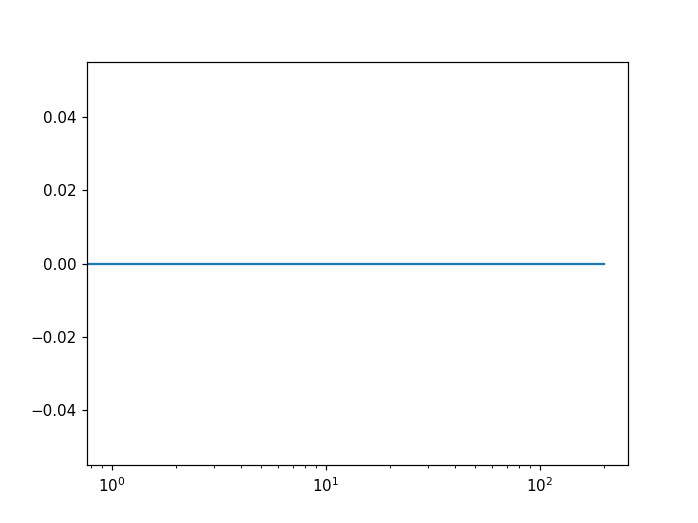

In [19]:
plt.figure()
semilogx(deposition_interpolated)

<IPython.core.display.Javascript object>


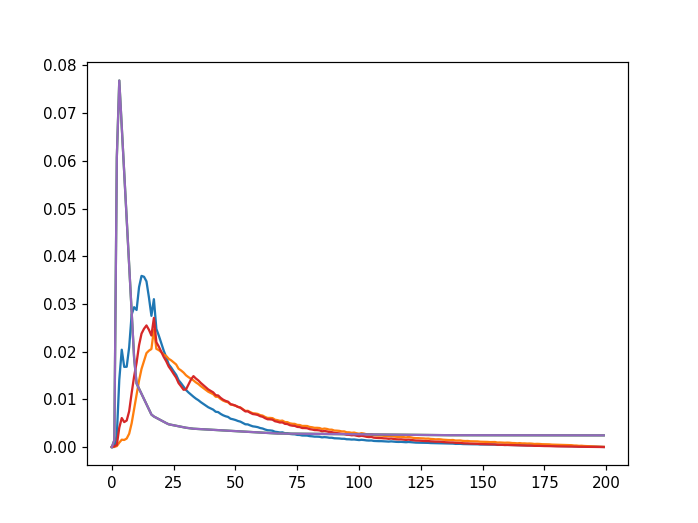

In [29]:
deposition_interpolated = np.interp(energies, original_energies_keV2/1000, edep)

weights = deposition_interpolated*fluence

weights /= np.sum(weights)

plt.figure()
plt.plot(weights)
plt.plot(fluence/np.sum(fluence))
plt.plot(deposition_interpolated/np.sum(deposition_interpolated))

plt.plot(array([2.91109946e-05, 1.76494311e-04, 4.30931334e-04, 4.06483184e-03,
       6.08329510e-03, 5.23664013e-03, 5.56408404e-03, 7.51434500e-03,
       1.13104531e-02, 1.48120881e-02, 1.76730904e-02, 2.13549584e-02,
       2.37863444e-02, 2.47969708e-02, 2.54946295e-02, 2.45832272e-02,
       2.33828193e-02, 2.70761653e-02, 2.19768027e-02, 2.10496040e-02,
       1.99862745e-02, 1.88744699e-02, 1.79808365e-02, 1.68726882e-02,
       1.61468370e-02, 1.53282606e-02, 1.45540757e-02, 1.34024669e-02,
       1.27325282e-02, 1.20114060e-02, 1.20817838e-02, 1.31176512e-02,
       1.41511006e-02, 1.48723160e-02, 1.43653242e-02, 1.39598949e-02,
       1.34333151e-02, 1.29836730e-02, 1.25576929e-02, 1.20813893e-02,
       1.17827635e-02, 1.14627601e-02, 1.08770402e-02, 1.08174153e-02,
       1.03158895e-02, 9.94049520e-03, 9.68223536e-03, 9.51505892e-03,
       9.00403680e-03, 8.87042314e-03, 8.68750939e-03, 8.41626074e-03,
       8.24999997e-03, 7.85078678e-03, 7.47907197e-03, 7.48322859e-03,
       7.18102227e-03, 6.92901730e-03, 6.85358560e-03, 6.73686776e-03,
       6.47294799e-03, 6.34679082e-03, 6.04706861e-03, 5.83120857e-03,
       5.81285705e-03, 5.74371625e-03, 5.41324306e-03, 5.30426277e-03,
       5.14366814e-03, 5.17613138e-03, 4.87196808e-03, 4.83215153e-03,
       4.58814109e-03, 4.48258209e-03, 4.44188777e-03, 4.22818602e-03,
       4.18858353e-03, 3.99434959e-03, 3.98431633e-03, 3.95012947e-03,
       3.76134422e-03, 3.68408791e-03, 3.56271867e-03, 3.55084355e-03,
       3.49892506e-03, 3.29851875e-03, 3.37239870e-03, 3.28753639e-03,
       3.13897495e-03, 3.12769812e-03, 2.95173888e-03, 2.92419224e-03,
       2.87119587e-03, 2.75948306e-03, 2.75259182e-03, 2.58365131e-03,
       2.56307996e-03, 2.47115462e-03, 2.49977941e-03, 2.37533220e-03,
       2.28110420e-03, 2.36743102e-03, 2.28170554e-03, 2.15637200e-03,
       2.09951431e-03, 2.12522307e-03, 1.96889026e-03, 1.92416094e-03,
       1.88599124e-03, 1.88433885e-03, 1.83211900e-03, 1.81038001e-03,
       1.72831474e-03, 1.79479603e-03, 1.69940699e-03, 1.63565663e-03,
       1.60698352e-03, 1.62212802e-03, 1.56098547e-03, 1.49968541e-03,
       1.56594283e-03, 1.49500599e-03, 1.40628776e-03, 1.36371248e-03,
       1.35509583e-03, 1.31867927e-03, 1.30122740e-03, 1.25485655e-03,
       1.26331361e-03, 1.20111828e-03, 1.17756580e-03, 1.12583028e-03,
       1.13919742e-03, 1.11724213e-03, 1.05377362e-03, 1.01256511e-03,
       9.85462350e-04, 9.62004228e-04, 9.67901489e-04, 8.81542552e-04,
       8.76004691e-04, 8.69113018e-04, 8.02520622e-04, 7.74770337e-04,
       7.74980703e-04, 7.24003872e-04, 7.13043505e-04, 7.07177703e-04,
       6.80572250e-04, 6.34601712e-04, 6.18991650e-04, 6.03024096e-04,
       5.88283899e-04, 5.59199169e-04, 5.54276319e-04, 5.51280058e-04,
       4.86898902e-04, 4.86980968e-04, 4.69425644e-04, 4.44595711e-04,
       4.49375878e-04, 4.29779347e-04, 3.94270565e-04, 3.82886950e-04,
       3.54590164e-04, 3.68844344e-04, 3.33657502e-04, 3.31951397e-04,
       3.09262222e-04, 3.09651655e-04, 2.89729042e-04, 2.57205928e-04,
       2.62862173e-04, 2.51026199e-04, 2.26682521e-04, 2.16342123e-04,
       2.14270914e-04, 2.00827609e-04, 1.78383164e-04, 1.68203221e-04,
       1.53507205e-04, 1.48681361e-04, 1.36302318e-04, 1.24345302e-04,
       1.26752113e-04, 1.10216193e-04, 1.11443180e-04, 9.04942357e-05,
       8.53701707e-05, 6.75103048e-05, 7.06795229e-05, 5.61617574e-05,
       4.93335658e-05, 4.57328583e-05, 3.98944352e-05, 3.33133974e-05,
       2.89111405e-05, 2.10723086e-05, 1.41276292e-05, 7.31626529e-06]))

ar = array([    0.        ,   483.73547823, 20441.03467887, 25890.93134379,
       22626.49582255, 19362.06030131, 16097.62478007, 12833.18925883,
        9568.75373759,  6304.31821635,  4489.46437882,  4124.19222502,
        3758.92007121,  3393.6479174 ,  3028.37576359,  2663.10360978,
        2297.83145597,  2159.26418579,  2066.03789233,  1972.81159888,
        1879.58530542,  1786.35901196,  1693.13271851,  1609.48403066,
        1573.72337087,  1537.96271108,  1502.20205129,  1466.4413915 ,
        1430.68073171,  1394.92007192,  1365.19637087,  1341.50962856,
        1317.82288625,  1296.39016874,  1286.22757525,  1276.06498176,
        1265.90238826,  1255.73979477,  1245.57720128,  1235.41460778,
        1225.25201429,  1215.08942079,  1204.9268273 ,  1194.76423381,
        1184.60164031,  1174.43904682,  1164.27645333,  1154.11385983,
        1143.95126634,  1133.78867285,  1123.62607935,  1113.46348586,
        1103.30089236,  1093.13829887,  1082.97570538,  1072.81311188,
        1062.65051839,  1052.4879249 ,  1042.3253314 ,  1032.16273791,
        1022.00014442,  1011.83755092,  1001.67495743,   991.51236393,
         981.34977044,   971.18717695,   961.02458345,   957.82636887,
         956.02103006,   954.21569125,   952.41035245,   950.60501364,
         948.79967484,   946.99433603,   945.18899722,   943.38365842,
         941.57831961,   939.7729808 ,   937.967642  ,   936.16230319,
         934.35696439,   932.55162558,   930.74628677,   928.94094797,
         927.13560916,   925.33027036,   923.52493155,   921.71959274,
         919.91425394,   918.10891513,   916.30357632,   914.49823752,
         912.69289871,   910.88755991,   909.0822211 ,   907.27688229,
         905.47154349,   903.66620468,   901.86086588,   900.05552707,
         898.25018826,   896.44484946,   894.63951065,   892.83417184,
         891.02883304,   889.22349423,   887.41815543,   885.61281662,
         883.80747781,   882.00213901,   880.1968002 ,   878.3914614 ,
         876.58612259,   874.78078378,   872.97544498,   871.17010617,
         869.36476736,   867.55942856,   865.75408975,   863.94875095,
         862.14341214,   860.33807333,   858.53273453,   856.72739572,
         854.92205692,   853.11671811,   851.3113793 ,   849.5060405 ,
         847.70070169,   845.89536288,   844.09002408,   842.28468527,
         840.47934647,   838.94394951,   838.7582618 ,   838.57257409,
         838.38688639,   838.20119868,   838.01551097,   837.82982326,
         837.64413556,   837.45844785,   837.27276014,   837.08707243,
         836.90138473,   836.71569702,   836.53000931,   836.3443216 ,
         836.1586339 ,   835.97294619,   835.78725848,   835.60157077,
         835.41588307,   835.23019536,   835.04450765,   834.85881994,
         834.67313224,   834.48744453,   834.30175682,   834.11606911,
         833.93038141,   833.7446937 ,   833.55900599,   833.37331828,
         833.18763058,   833.00194287,   832.81625516,   832.63056745,
         832.44487975,   832.25919204,   832.07350433,   831.88781662,
         831.70212892,   831.51644121,   831.3307535 ,   831.14506579,
         830.95937809,   830.77369038,   830.58800267,   830.40231496,
         830.21662726,   830.03093955,   829.84525184,   829.65956413,
         829.47387643,   829.28818872,   829.10250101,   828.9168133 ,
         828.7311256 ,   828.54543789,   828.35975018,   828.17406247,
         827.98837477,   827.80268706,   827.61699935,   827.43131164,
         827.24562394,   827.05993623,   826.87424852,   826.68856081])

plt.plot(ar/np.sum(ar))

<IPython.core.display.Javascript object>


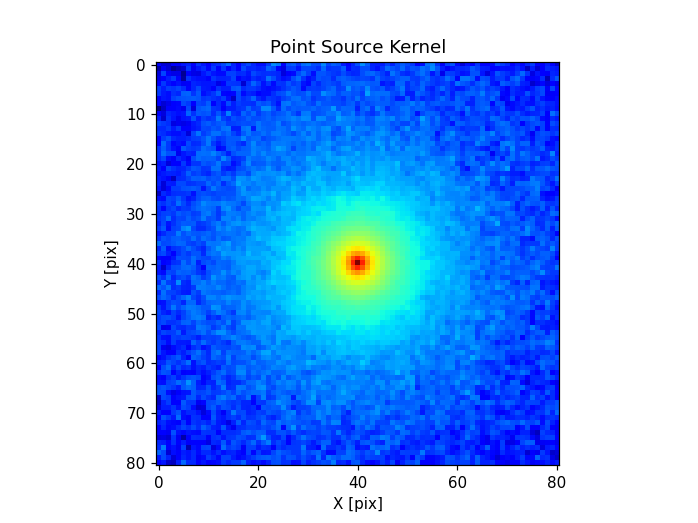

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

kernel.get_plot(ax)

<IPython.core.display.Javascript object>


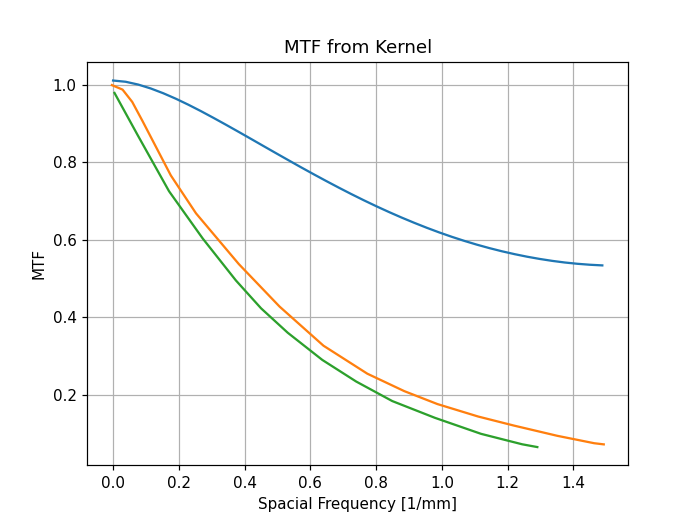

In [4]:
center = int(kernel.kernel.shape[0]/2)
lsf = kernel.kernel[center,:]

N = kernel.kernel.shape[0]

# if N < 40:
# T = 0.784
# else:
T = 0.336

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

mtf = np.absolute(np.fft.fft(lsf))
mtf_final = np.fft.fftshift(mtf)

nn = 0

fig = plt.figure(1)
place = fig.add_subplot(111)
place.plot(xf[:center-nn],mtf_final[center:center + center-nn]/mtf_final[center+2])
place.set_title('MTF from Kernel')
place.set_xlabel('Spacial Frequency [1/mm]')
place.set_ylabel('MTF')
place.grid()

shi_data = [-0.0036600255852107244, 0.9985732893897139,
0.028883896178828306, 0.9869637814824851,
0.05821655345648036, 0.9552964008777066,
0.08921020960640147, 0.9064175751164883,
0.1218386383306087, 0.8532306428065635,
0.17567540002389503, 0.7655438897096748,
0.25229698659836164, 0.6677232950720785,
0.38264460160796343, 0.5366967103480229,
0.5064443842210934, 0.42720366468803805,
0.6399828654853176, 0.326270882689769,
0.7734630660873568, 0.25401218648646273,
0.8857495038858628, 0.20908478962137955,
0.9866304160947875, 0.17567598283051677,
1.1102728409200182, 0.14360296881693158,
1.2192635072719695, 0.1201951236569948,
1.3510244283395543, 0.09382195840509122,
1.4632584135420945, 0.07470123875547463,
1.4925327901575614, 0.07170794394565894]

shi_x = shi_data[::2]
shi_y = shi_data[1::2]

star_data = [0.0043086409992885155, 0.9784172661870504,
0.07416396553087196, 0.8705035971223021,
0.17022689540675146, 0.7248201438848921,
0.2729860067989565, 0.6025179856115108,
0.3736105620997708, 0.4946043165467626,
0.4502174084907898, 0.42266187050359716,
0.5312593880939205, 0.3597122302158273,
0.6364455688196695, 0.289568345323741,
0.7394971934540282, 0.23381294964028776,
0.8491659419716973, 0.1834532374100719,
0.9786465333227923, 0.14028776978417268,
1.1191240414261996, 0.09892086330935257,
1.2442801802514032, 0.07194244604316546,
1.2904024033520434, 0.06474820143884896]

star_x = star_data[::2]
star_y = star_data[1::2]

plt.plot(shi_x,shi_y)
plt.plot(star_x,star_y)

<IPython.core.display.Javascript object>


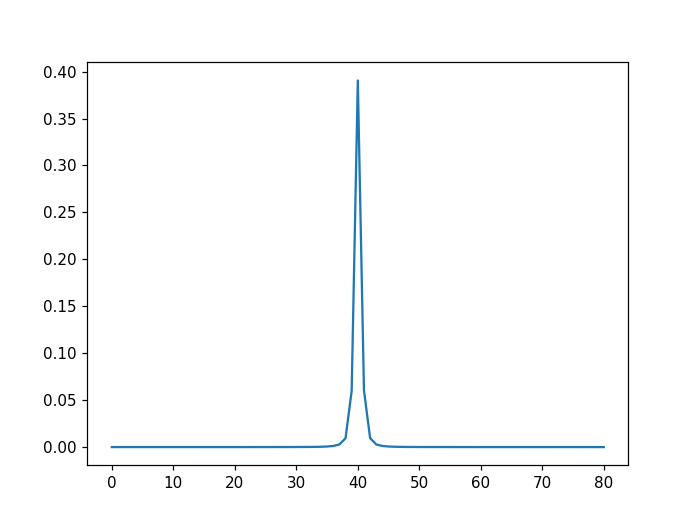

In [5]:
plt.figure()
plt.plot(lsf)

In [62]:
kernel.kernel.shape

(81, 81)

<IPython.core.display.Javascript object>


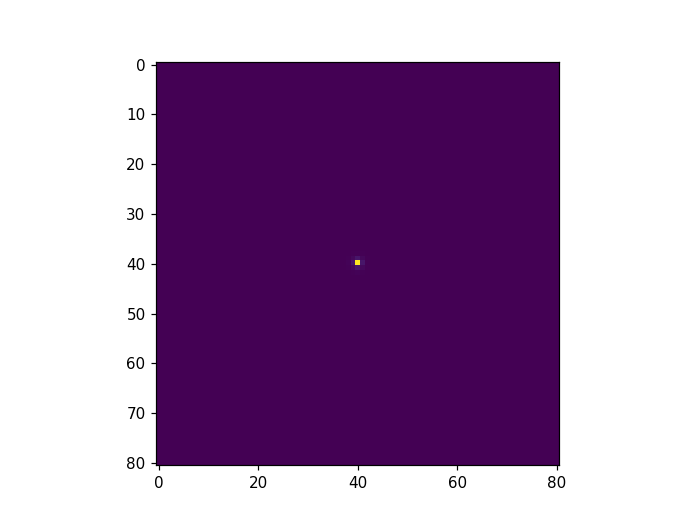

In [63]:
plt.figure()
plt.imshow(kernel.kernel)